In [15]:
import os

##### For reproducibility
seed_value= 1
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)

import torch

import matplotlib.pyplot as plt
        

In [ ]:
def gen_cheby(a, b, degree):
    x = np.linspace(a, b, 100000)
    y = np.maximum(0, x)
    chebSeries = np.polynomial.chebyshev.chebfit(x, y, degree)
    coefs = np.polynomial.chebyshev.cheb2poly(chebSeries)
    return torch.tensor(coefs)

def gen_cheby2(degree):
    x = np.linspace(-1, 1, 100000)
    y = np.maximum(0, x)
    chebSeries = np.polynomial.chebyshev.chebfit(x, y, degree)
    coefs = np.polynomial.chebyshev.cheb2poly(chebSeries)
    return torch.tensor(coefs)

def poly_horner(coefficients,x):
    """Horner's method used for evaluation of the polynomial defined by self.coefficients at a given point x
    coefficients order is from 0
    """
    t = x.dtype
    #x = x.type(torch.float32)
    result = coefficients[-1]
    for i in range(2, coefficients.shape[0] + 1):
        result = coefficients[-i] + result*x
    return result

def plot_relu(a, b):
    degree = 40
    
    coefs = gen_cheby(a, b, degree)
    dom = np.linspace(a, b, 1000)
    ran = poly_horner(coefs, dom)
    
    a = max(abs(a), abs(b))
    coefs2 = gen_cheby2(degree)
    ran2 = poly_horner(coefs2, dom/a)*a
    plt.plot(dom, ran)
    plt.plot(dom, ran2)
    plt.figure()

/home2/fsgf66/project/HeLayers/.venv/lib/python3.8/site-packages/numpy/polynomial/chebyshev.py:1671: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


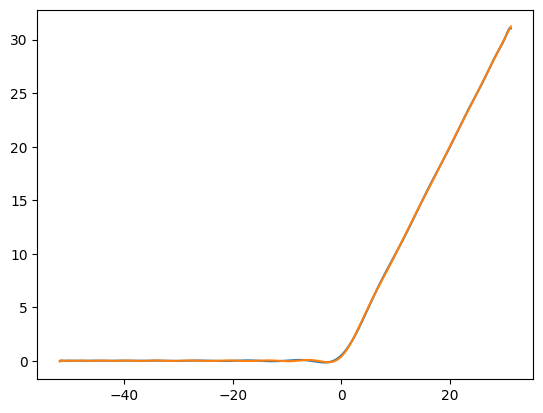

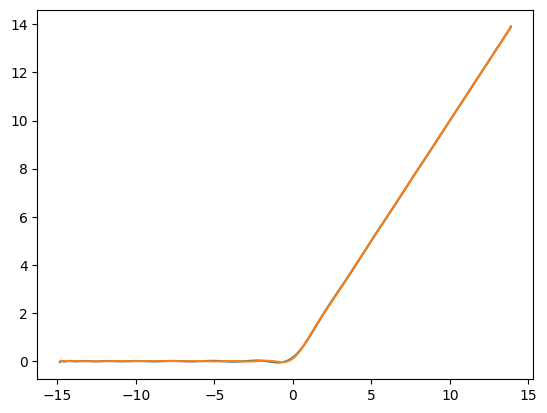

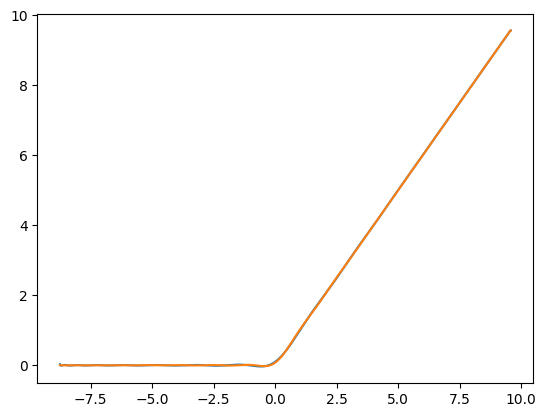

<Figure size 640x480 with 0 Axes>

In [46]:
## CHEBYSHEV STUFF

plot_relu(-51.881622314453125, 31.250837326049805)
plot_relu(-14.832443237304688, 13.879768371582031)
plot_relu(-8.751751899719238, 9.584371566772461)
plt.show()
        